<a href="https://colab.research.google.com/github/Hardikmirani/Toxic-comment-detection/blob/main/toxic_10_dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
len(data)

159571

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
data.toxic.value_counts(normalize=True)

0    0.904156
1    0.095844
Name: toxic, dtype: float64

In [ ]:
data_count=data.iloc[:,2:].sum()
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [ ]:
data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [ ]:
import re
import string

alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
remove_n = lambda x: re.sub("\n", " ", x)
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)
data['comment_text'] = data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [ ]:
data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [ ]:
subset=data[data['identity_hate']==1]
subset

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1,0,1,0,1,1
105,00472b8e2d38d1ea,a pair of jew hating weiner nazi schmucks,1,0,1,0,1,1
176,006b94add72ed61c,i think that your a fagget get a oife and burn...,1,0,1,1,1,1
218,008e0818dde894fb,kill all niggers i have hard that others h...,1,0,1,0,1,1
238,0097dd5c29bf7a15,u r a tw fuck off u gay boy u r smelly fuck u...,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...
159281,fb726deec64157bd,lol you re gay you will never know how g...,1,1,1,0,1,1
159336,fc3efa2f6f025f6d,oh fuck off the pansy jew would just whine a...,1,0,1,0,1,1
159400,fd052883fa6a8697,shalom semite get the fuck out of here i w...,1,1,1,1,1,1
159449,fdce660ddcd6d7ca,i think he is a gay fag,1,0,0,0,0,1


In [ ]:
import wordcloud
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

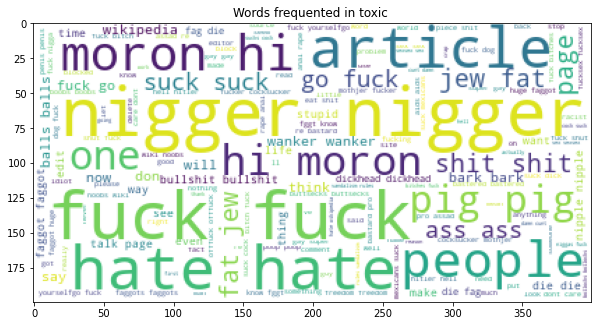

In [ ]:
subset=data[data['toxic']==1]
text=subset.comment_text.values
wc= WordCloud(background_color="white",max_words=4000)

wc.generate(" ".join(text))

plt.figure(figsize=(10,10))
plt.title("Words frequented in toxic ")
plt.imshow(wc.recolor(random_state=244), alpha=0.98)

In [ ]:
data_tox = data.loc[:,['id','comment_text','toxic']]
data_sev = data.loc[:,['id','comment_text','severe_toxic']]
data_obs = data.loc[:,['id','comment_text','obscene']]
data_thr = data.loc[:,['id','comment_text','threat']]
data_ins = data.loc[:,['id','comment_text','insult']]
data_ide = data.loc[:,['id','comment_text','identity_hate']]

data_tox.head()

,id,comment_text,toxic
0,0000997932d777bf,explanation why the edits made under my userna...,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0


In [ ]:
print(len(data_tox))

159571


In [ ]:
data_tox_1 = data_tox[data_tox['toxic'] == 1]
len(data_tox_1)

15294

In [ ]:
data_tox_1 = data_tox[data_tox['toxic'] == 1].iloc[0:5000,:]
data_tox_0 = data_tox[data_tox['toxic'] == 0].iloc[0:5000,:]
data_tox_done = pd.concat([data_tox_1, data_tox_0], axis=0)

In [ ]:
data_tox_done

,id,comment_text,toxic
6,0002bcb3da6cb337,cocksucker before you piss around on my work,1
12,0005c987bdfc9d4b,hey what is it talk what is it a...,1
16,0007e25b2121310b,bye don t look come or think of comming ba...,1
42,001810bf8c45bf5f,you are gay or antisemmitian archangel whit...,1
43,00190820581d90ce,fuck your filthy mother in the ass dry,1
...,...,...,...
5544,0ece9249484eddb9,electronic intifada is not an activist site w...,0
5545,0ece971b58a3def7,new genre the new genre supernatural was use...,0
5547,0ecf7cde3391615b,translated as the second vatican council a ...,0
5549,0ed11396420e8531,purpose this rfc will be used to determine com...,0


In [ ]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1]
len(data_sev_1)

1595

In [ ]:
data_sev_1 = data_sev[data_sev['severe_toxic'] == 1].iloc[0:1595,:]
data_sev_0 = data_sev[data_sev['severe_toxic'] == 0].iloc[0:1595,:]
data_sev_done = pd.concat([data_sev_1, data_sev_0], axis=0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
X = data_tox_done.comment_text
y = data_tox_done['toxic']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tfv = TfidfVectorizer(ngram_range=(1,1), stop_words='english')

X_train_fit = tfv.fit_transform(X_train)
X_test_fit = tfv.transform(X_test)

randomforest = RandomForestClassifier(n_estimators=100, random_state=42)

randomforest.fit(X_train_fit, y_train)
randomforest.predict(X_test_fit)

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
a_try = ['You are my brother']

a_vec = tfv.transform(a_try)
print(randomforest.predict(a_vec))
randomforest.predict_proba(a_vec)[:,1]

[0]


array([0.27499129])

In [ ]:
a2_try = ['You will die']

a2_vec = tfv.transform(a2_try)
print(randomforest.predict_proba(a2_vec)[:,1])
print(randomforest.predict(a2_vec))

[0.91158716]
[1]


In [ ]:
op = [0.9115]

In [ ]:
a2_try = ['I will kill you']

a2_vec = tfv.transform(a2_try)
op = randomforest.predict_proba(a2_vec)[:,1]
print(op)
print(randomforest.predict(a2_vec))
if op[0] >0.5:
  print('It is Toxic comment ')
else:
  print('It is not Toxic')

[0.96422222]
[1]
It is Toxic comment 
